In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
#Read in csv 
df = pd.read_csv("data/exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

df.head(60)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


# Select your features (columns)

In [3]:
list(df.columns)

['koi_disposition',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [4]:
# Set features. This will also be used as your x values.
selected_features = df.drop("koi_disposition", axis=1)
selected_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
# Assign the data to X and y
X = selected_features

y = df['koi_disposition']

print(X.shape, y.shape)

(6991, 40) (6991,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [7]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5448,0,1,0,0,6.099033,3.050000e-07,-3.050000e-07,135.522395,0.000041,-0.000041,...,-209,4.297,0.175,-0.175,1.141,0.312,-0.208,296.71408,44.577209,13.745
5953,0,1,1,0,18.360224,2.658000e-04,-2.658000e-04,143.475300,0.015900,-0.015900,...,-176,4.551,0.029,-0.029,0.856,0.371,-0.069,299.02518,42.061729,15.703
2226,0,0,0,0,25.752750,6.390000e-05,-6.390000e-05,136.438510,0.001860,-0.001860,...,-74,4.501,0.072,-0.022,0.826,0.032,-0.060,294.66797,43.853260,14.550
6586,1,0,0,0,354.789700,1.340000e-01,-1.340000e-01,434.394000,0.156000,-0.156000,...,-83,4.742,0.071,-0.038,0.515,0.048,-0.071,293.96423,41.318802,10.067
4346,0,1,1,1,2.845736,3.190000e-06,-3.190000e-06,134.280263,0.000954,-0.000954,...,-94,2.745,0.195,-0.105,10.154,2.818,-3.757,296.67810,40.649029,12.367


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale the data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

print(y_train_categorical)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Train the Model



k: 1, Train/Test Score: 1.000/0.783
k: 3, Train/Test Score: 0.895/0.803
k: 5, Train/Test Score: 0.878/0.818
k: 7, Train/Test Score: 0.865/0.823
k: 9, Train/Test Score: 0.861/0.823
k: 11, Train/Test Score: 0.853/0.819
k: 13, Train/Test Score: 0.850/0.816
k: 15, Train/Test Score: 0.850/0.820
k: 17, Train/Test Score: 0.846/0.814
k: 19, Train/Test Score: 0.844/0.812


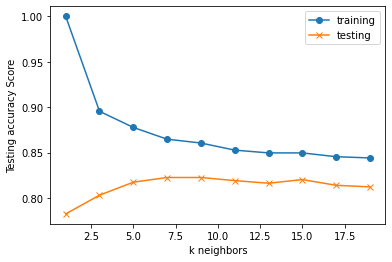

In [16]:
# Create K Nearest Neighbors Algorithm
# Loop through different k values to see which has the highest accuracy
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_categorical)
    train_score = knn.score(X_train_scaled, y_train_categorical)
    test_score = knn.score(X_test_scaled, y_test_categorical)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 21, 2), train_scores, marker='o', label="training")
plt.plot(range(1, 21, 2), test_scores, marker="x", label="testing")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()

In [14]:
# Quantify our model w the k that seems to be the best fit
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train_categorical)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_categorical))

k=15 Test Acc: 0.816


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [19]:
# Guidance provided by https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
# And https://gist.github.com/sawansaurabh/3748a083ffdec38aacb8f43660a5f654
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
grid_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 
               'weights': ['uniform', 'distance'], 
               'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv = 5, n_jobs= -1, scoring = 'accuracy')
grid.fit(X_train_scaled, y_train_categorical)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    9.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.8449308319810216


In [23]:
# Quantify our hypertuned model
knn2 = KNeighborsClassifier(n_neighbors=9, metric= 'manhattan', weights='distance')
knn2.fit(X_train_scaled, y_train_categorical)
print('k=15 Test Acc: %.3f' % knn2.score(X_test_scaled, y_test_categorical))

k=15 Test Acc: 0.841


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'julia_obrien.sav'
joblib.dump(knn2, filename)